In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_friendrequest.parquet'

# 데이터 불러오기
friendrequest_df = pd.read_parquet(gcs_path, engine='pyarrow')
friendrequest_df

,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521
...,...,...,...,...,...,...
17147170,19692975,P,2024-05-09 07:24:50,2024-05-09 07:24:50,1583730,1583731
17147171,19692976,A,2024-05-09 07:31:41,2024-05-09 07:33:06,1583731,1583673
17147172,19692977,P,2024-05-09 08:20:44,2024-05-09 08:20:44,1299129,1575671
17147173,19692978,R,2024-05-09 09:19:40,2024-05-09 09:19:43,1304403,1392729


In [10]:
friendrequest_df.dtypes

id                          int64
status                     object
created_at         datetime64[ns]
updated_at         datetime64[ns]
receive_user_id             int64
send_user_id                int64
dtype: object

In [11]:
friendrequest_df.isnull().sum()

id                 0
status             0
created_at         0
updated_at         0
receive_user_id    0
send_user_id       0
dtype: int64

In [12]:
friendrequest_df.describe(include='all')

,id,status,created_at,updated_at,receive_user_id,send_user_id
count,1.714718e+07,17147175,17147175,17147175,1.714718e+07,1.714718e+07
unique,NaN,3,NaN,NaN,NaN,NaN
top,NaN,A,NaN,NaN,NaN,NaN
freq,NaN,12878407,NaN,NaN,NaN,NaN
mean,9.855565e+06,NaN,2023-05-17 19:14:14.416623360,2023-05-19 03:18:26.881183232,1.154812e+06,1.215895e+06
min,7.000000e+00,NaN,2023-04-17 18:29:11,2023-04-17 18:29:11,8.319620e+05,8.319620e+05
25%,4.940746e+06,NaN,2023-05-10 10:53:21,2023-05-11 03:51:13,9.737080e+05,1.029359e+06
50%,9.810449e+06,NaN,2023-05-15 10:38:56,2023-05-16 10:24:42,1.138343e+06,1.213751e+06
75%,1.477598e+07,NaN,2023-05-22 14:28:30,2023-05-23 21:37:16,1.317869e+06,1.405678e+06
max,1.969298e+07,NaN,2024-05-09 09:21:47,2024-05-09 09:21:47,1.583731e+06,1.583732e+06


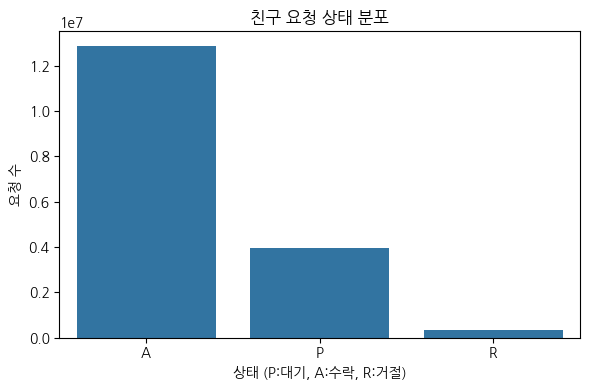

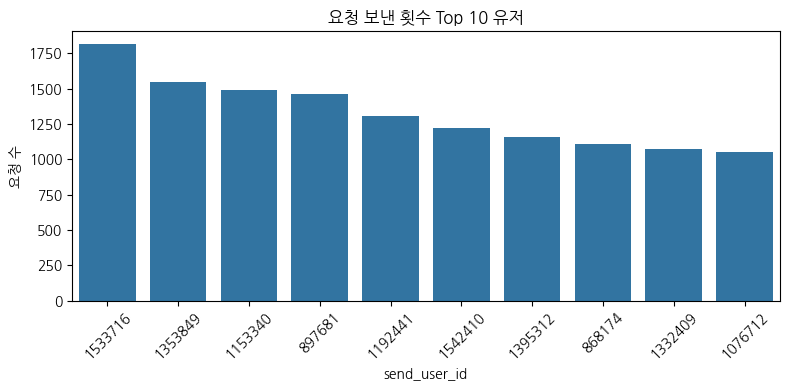

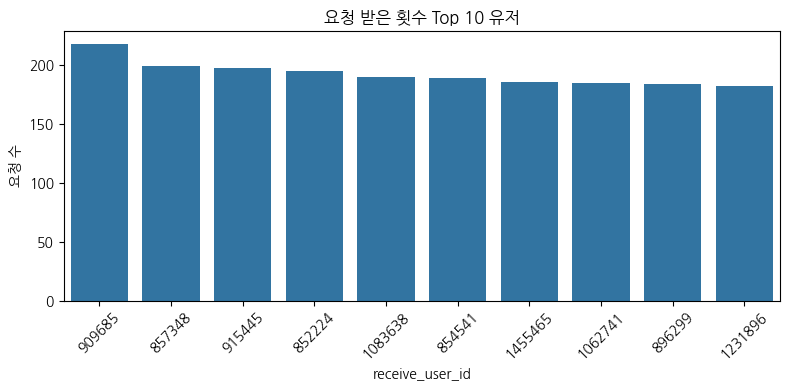

In [13]:

# status 분포 시각화
status_counts = friendrequest_df['status'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('친구 요청 상태 분포')
plt.xlabel('상태 (P:대기, A:수락, R:거절)')
plt.ylabel('요청 수')
plt.tight_layout()
plt.show()

# 유저별 요청 보낸 수 (send_user_id)
send_counts = friendrequest_df['send_user_id'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=send_counts.index.astype(str), y=send_counts.values)
plt.title('요청 보낸 횟수 Top 10 유저')
plt.xlabel('send_user_id')
plt.ylabel('요청 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 유저별 요청 받은 수 (receive_user_id)
receive_counts = friendrequest_df['receive_user_id'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=receive_counts.index.astype(str), y=receive_counts.values)
plt.title('요청 받은 횟수 Top 10 유저')
plt.xlabel('receive_user_id')
plt.ylabel('요청 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. status 분포
- 수락(A) 비율이 압도적 (약 75%)
- 대기(P) 요청도 상당수 존재 (약 23%)
- 거절(R) 은 매우 드묾
               
2. 요청 많이 보낸 유저 Top 10
- 최다 요청 유저 1533716은 1,800건 이상 전송
- 상위권 유저 모두 1,000건 이상 전송 → 비정상 활동(스팸 가능성) 의심 가능
                
3. 요청 많이 받은 유저 상위 10명
- 대부분 180~210건 수준
- 특정 유저(예: 909685)는 과도하게 많은 요청을 받은 것으로 보임 → 인기 유저일 가능성

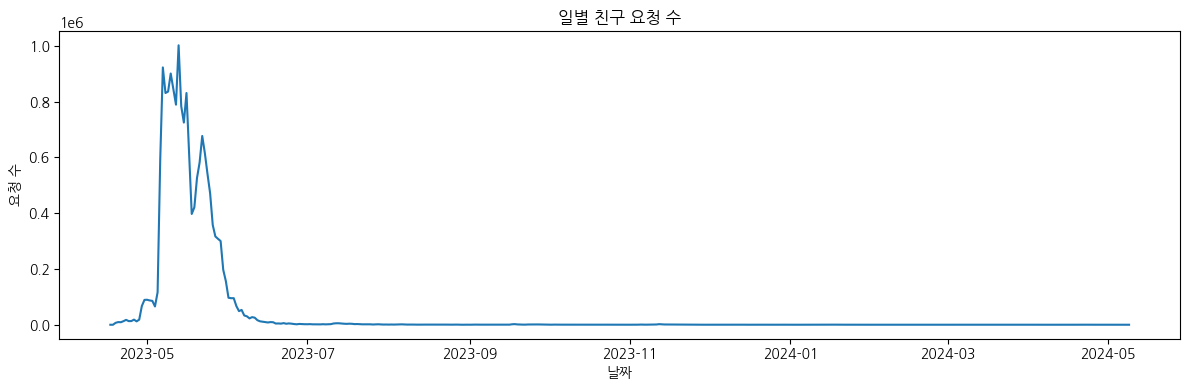

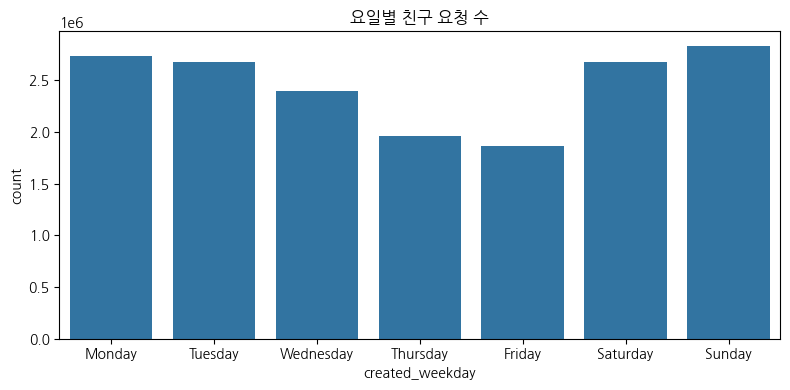

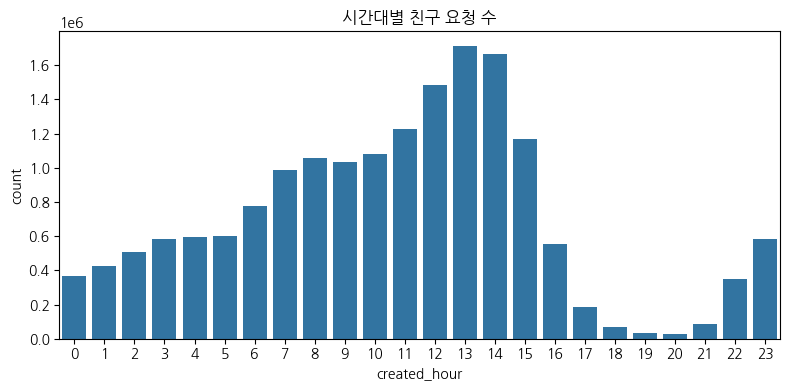

In [14]:
# 날짜 파생 변수 생성
friendrequest_df['created_date'] = friendrequest_df['created_at'].dt.date
friendrequest_df['created_hour'] = friendrequest_df['created_at'].dt.hour
friendrequest_df['created_weekday'] = friendrequest_df['created_at'].dt.day_name()

# 1. 일별 요청 수 추이
daily_counts = friendrequest_df['created_date'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
daily_counts.plot(kind='line')
plt.title('일별 친구 요청 수')
plt.xlabel('날짜')
plt.ylabel('요청 수')
plt.tight_layout()
plt.show()

# 2. 요일별 요청 수 분포
plt.figure(figsize=(8, 4))
sns.countplot(data=friendrequest_df, x='created_weekday',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('요일별 친구 요청 수')
plt.tight_layout()
plt.show()

# 3. 시간대별 요청 수 분포
plt.figure(figsize=(8, 4))
sns.countplot(data=friendrequest_df, x='created_hour')
plt.title('시간대별 친구 요청 수')
plt.tight_layout()
plt.show()

1. 일별 친구 요청 수
- 2023년 5월에 폭발적으로 증가 → 하루 100만 건 이상
- 이후 급격한 감소 → 비정상적 활동(예: 마케팅, 봇 등) 가능성
                       
2. 요일별 요청 수
- 주말(Sat/Sun)과 월요일에 가장 많음
- 금요일에 가장 적음 → 흥미로운 행동 패턴
                    
3. 시간대별 요청 수
- 정오14시(1214시) 집중
- 18시 이후 급격한 감소, → 일반적인 서비스와는 반대 추세 (일반적으론 저녁 시간대가 활성화됨)

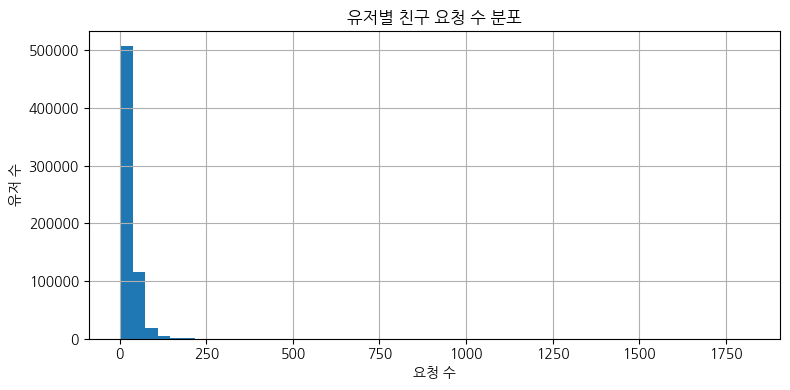

status        total  accept_rate  pending_rate  reject_rate
send_user_id                                               
1583294       115.0     0.000000      1.000000     0.000000
1583669       207.0     0.000000      1.000000     0.000000
1582373       157.0     0.000000      1.000000     0.000000
1583722       178.0     0.005618      0.994382     0.000000
1582701       116.0     0.017241      0.982759     0.000000
1581165       114.0     0.017544      0.982456     0.000000
1581912       106.0     0.018868      0.981132     0.000000
1579644       106.0     0.028302      0.971698     0.000000
1580059       103.0     0.038835      0.951456     0.009709
1581509       207.0     0.043478      0.956522     0.000000


In [15]:
# 유저별 보낸 요청 수 + 상태별 비율
status_by_user = friendrequest_df.groupby(['send_user_id', 'status'])['id'].count().unstack().fillna(0)
status_by_user['total'] = status_by_user.sum(axis=1)
status_by_user['accept_rate'] = status_by_user['A'] / status_by_user['total']
status_by_user['pending_rate'] = status_by_user['P'] / status_by_user['total']
status_by_user['reject_rate'] = status_by_user['R'] / status_by_user['total']

# 1. 유저별 보낸 요청 수 분포
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
status_by_user['total'].hist(bins=50)
plt.title('유저별 친구 요청 수 분포')
plt.xlabel('요청 수')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

# 2. 요청 많이 보낸 유저 중 수락률 낮은 경우 상위 10명
spammy_users = status_by_user[status_by_user['total'] > 100].sort_values(by='accept_rate').head(10)
print(spammy_users[['total', 'accept_rate', 'pending_rate', 'reject_rate']])

1. 유저별 요청 수 분포
- 대부분의 유저는 요청을 10건 이하로 보냄
- 일부 유저만 수백 건 이상 요청 → 상위 1% 유저가 전체 요청 수의 다수를 차지
               
2. 수락률 기반 비정상 유저 탐지
- send_user_id = 1583294 → 115건 전부 대기 상태
- send_user_id = 1583669 → 207건 전부 대기
- 수락률 0% or 극단적으로 낮은 유저 다수 존재 → 악성 유저 혹은 스팸 가능성 높음



In [6]:
# 1. 완전 동일한 행 중복 수
duplicate_full = friendrequest_df.duplicated().sum()
print(f"완전 동일한 행 중복 수: {duplicate_full}")

# 2. 보낸-받은 유저 조합 + 생성 시각 중복 확인
duplicate_pair_time = friendrequest_df.duplicated(subset=['send_user_id', 'receive_user_id', 'created_at']).sum()
print(f"동일 유저 간 같은 시간에 요청한 중복 수: {duplicate_pair_time}")

# 3. 유저 간 중복 요청 수 (상태 무관하게)
user_pair_dup = friendrequest_df.duplicated(subset=['send_user_id', 'receive_user_id']).sum()
print(f"동일 유저에게 중복 요청한 수 (다른 시간이라도): {user_pair_dup}")

# 4. 유저 쌍별 요청 횟수 top 10 확인
pair_counts = friendrequest_df.groupby(['send_user_id', 'receive_user_id']).size().reset_index(name='count')
pair_counts = pair_counts.sort_values(by='count', ascending=False).head(10)
print("동일한 유저 쌍 요청 횟수 Top 10:")
print(pair_counts)


완전 동일한 행 중복 수: 0
동일 유저 간 같은 시간에 요청한 중복 수: 149
동일 유저에게 중복 요청한 수 (다른 시간이라도): 108941
동일한 유저 쌍 요청 횟수 Top 10:
          send_user_id  receive_user_id  count
10055272       1282498          1192447     41
15041917       1500979          1502491     36
6491657        1125597          1107316     35
7808037        1183441          1186372     28
1344203         906239          1069804     27
13049223       1419309          1376095     27
14758518       1489531          1464677     26
8861841        1229080          1388357     26
3569818         999324          1318098     24
3508844         997022           941087     23


1. 같은 유저 쌍이 같은 시간에 요청한 중복 수: 149건
- send_user_id, receive_user_id, created_at이 모두 같은 경우 → 시스템/로직 문제 가능성 있음
              
2. 동일 유저 쌍의 중복 요청 (다른 시간에 반복): 108,941건
- 한 유저가 같은 상대에게 여러 번 친구 요청을 시도함
- 상위 10쌍은 최대 41회까지 요청 → 일반적인 행동으로 보기 어려움

In [8]:
# 동일 유저쌍 중 status 같은데 updated_at만 다른 경우

dups = (
    friendrequest_df
    .sort_values("updated_at")
    .groupby(["send_user_id", "receive_user_id", "status"])
    .agg(requests=("id", "count"), min_time=("updated_at", "min"), max_time=("updated_at", "max"))
    .query("requests > 1 and min_time != max_time")
)

print("같은 상태지만 updated_at이 달랐던 유저쌍 수:", len(dups))


같은 상태지만 updated_at이 달랐던 유저쌍 수: 41415


In [11]:
# 동일 상태·시간까지 완전 동일한 경우 → 시스템 중복 가능성

full_dup = friendrequest_df.duplicated(subset=["send_user_id", "receive_user_id", "status", "updated_at"])
print("완전히 같은 상태/시간 조합 중복 수:", full_dup.sum())


완전히 같은 상태/시간 조합 중복 수: 63


In [20]:
# 1. 상태가 'R'(거절)인 요청만 필터링
rejected_df = friendrequest_df[friendrequest_df['status'] == 'R']

# 2. 거절당한 유저별 요청 수 집계
rejected_counts = rejected_df['send_user_id'].value_counts().reset_index()
rejected_counts.columns = ['send_user_id', 'rejected_count']

# 3. 가장 많이 거절당한 유저 Top 10
top_rejected = rejected_counts.head(20)
print("거절당한 횟수 상위 20명:")
print(top_rejected)


거절당한 횟수 상위 20명:
    send_user_id  rejected_count
0        1533716             452
1        1395312             419
2         897681             321
3         877266             316
4        1353849             278
5        1496245             269
6        1192441             267
7        1153340             262
8        1380465             257
9        1495281             250
10        853003             242
11        987572             219
12        895356             209
13       1076712             202
14       1059160             198
15       1333245             190
16        858627             159
17       1472460             156
18       1077842             153
19        875979             148


In [3]:
# 한 유저 쌍에 여러 상태가 있는지 확인
friendrequest_df.groupby(["send_user_id", "receive_user_id"]).size().value_counts()

1     16965195
2        53937
3        11320
4         4037
5         1746
6          868
7          442
8          276
9          137
10          85
11          64
12          42
14          19
13          17
16           9
15           9
20           7
19           4
17           3
18           3
27           2
23           2
21           2
26           2
22           1
24           1
35           1
28           1
41           1
36           1
Name: count, dtype: int64

In [13]:
duplicate_pair_time_with_status = friendrequest_df.duplicated(
    subset=['send_user_id', 'receive_user_id', 'created_at', 'status']
).sum()

duplicate_pair_time_with_status

144

In [14]:
# 1. status 미포함 중복 수 (기존 방식)
duplicate_pair_time = friendrequest_df.duplicated(
    subset=['send_user_id', 'receive_user_id', 'created_at']
).sum()
print(f"동일 유저 간 같은 시간에 요청한 중복 수 (status 미포함): {duplicate_pair_time}")

# 2. status 포함 중복 수
duplicate_pair_time_with_status = friendrequest_df.duplicated(
    subset=['send_user_id', 'receive_user_id', 'created_at', 'status']
).sum()
print(f"동일 유저 간 같은 시간에 요청한 중복 수 (status 포함): {duplicate_pair_time_with_status}")


동일 유저 간 같은 시간에 요청한 중복 수 (status 미포함): 149
동일 유저 간 같은 시간에 요청한 중복 수 (status 포함): 144


In [15]:
# status 포함하여 중복 행 수 확인
duplicate_pair_time_with_status = friendrequest_df.duplicated(
    subset=['send_user_id', 'receive_user_id', 'created_at', 'status']
).sum()

print(f"동일 유저 간 같은 시간에 같은 status로 요청한 중복 수: {duplicate_pair_time_with_status}")


동일 유저 간 같은 시간에 같은 status로 요청한 중복 수: 144


In [16]:
duplicates = friendrequest_df[
    friendrequest_df.duplicated(subset=['send_user_id', 'receive_user_id', 'created_at', 'status'], keep=False)
]
display(duplicates)


,id,status,created_at,updated_at,receive_user_id,send_user_id
2366996,2774524,A,2023-05-08 04:38:36,2023-05-08 07:15:47,892254,990693
2366997,2774525,A,2023-05-08 04:38:36,2023-05-08 08:00:44,895626,990693
2366998,2774526,A,2023-05-08 04:38:36,2023-05-08 07:26:40,899005,990693
2366999,2774527,P,2023-05-08 04:38:36,2023-05-08 04:38:36,899664,990693
2367000,2774528,P,2023-05-08 04:38:36,2023-05-08 04:38:36,906947,990693
...,...,...,...,...,...,...
17113165,19657840,P,2023-11-13 12:48:34,2023-11-13 12:48:34,1350806,1581706
17113166,19657841,P,2023-11-13 12:48:34,2023-11-13 12:48:34,1351398,1581706
17113167,19657842,P,2023-11-13 12:48:34,2023-11-13 12:48:34,1424868,1581706
17113168,19657843,P,2023-11-13 12:48:34,2023-11-13 12:48:34,1468396,1581706


In [17]:
duplicate_groups = duplicates.drop_duplicates(subset=['send_user_id', 'receive_user_id', 'created_at', 'status'])
print(f"중복된 조합의 유니크한 개수: {duplicate_groups.shape[0]}")


중복된 조합의 유니크한 개수: 144


#### 5, 6, 7월 데이터로 status까지 포함된 중복 요청만 필터링

In [18]:
# created_at을 datetime 형식으로 변환
friendrequest_df['created_at'] = pd.to_datetime(friendrequest_df['created_at'])

# 5, 6, 7월 데이터로 필터링
friendrequest_5to7 = friendrequest_df[friendrequest_df['created_at'].dt.month.isin([5, 6, 7])]

# 중복 확인 (status 포함)
duplicates_5to7 = friendrequest_5to7[
    friendrequest_5to7.duplicated(subset=['send_user_id', 'receive_user_id', 'created_at', 'status'], keep=False)
]

# 결과 출력
print(f"5~7월 중 status까지 같은 중복 요청 수: {len(duplicates_5to7)}")
display(duplicates_5to7)

5~7월 중 status까지 같은 중복 요청 수: 210


,id,status,created_at,updated_at,receive_user_id,send_user_id
2366996,2774524,A,2023-05-08 04:38:36,2023-05-08 07:15:47,892254,990693
2366997,2774525,A,2023-05-08 04:38:36,2023-05-08 08:00:44,895626,990693
2366998,2774526,A,2023-05-08 04:38:36,2023-05-08 07:26:40,899005,990693
2366999,2774527,P,2023-05-08 04:38:36,2023-05-08 04:38:36,899664,990693
2367000,2774528,P,2023-05-08 04:38:36,2023-05-08 04:38:36,906947,990693
...,...,...,...,...,...,...
14619507,16830737,A,2023-05-25 22:53:33,2023-06-01 14:42:50,1508756,1512824
14784705,17021671,A,2023-05-26 09:43:30,2023-05-27 09:08:55,1129805,1096077
14784706,17021672,A,2023-05-26 09:43:30,2023-05-27 09:08:57,1129805,1096077
15587356,17937595,A,2023-05-28 15:50:22,2023-05-28 16:07:01,1511973,1539720


In [21]:
# created_at을 datetime으로 변환 (이미 되어있다면 생략)
friendrequest_df['created_at'] = pd.to_datetime(friendrequest_df['created_at'])

# 2023년 5~7월 데이터 필터링
friendrequest_23_5to7 = friendrequest_df[
    (friendrequest_df['created_at'].dt.year == 2023) &
    (friendrequest_df['created_at'].dt.month.isin([5, 6, 7]))
]

# 중복 제거: send, receive, created_at, status 기준
deduplicated_23_5to7 = friendrequest_23_5to7.drop_duplicates(
    subset=['send_user_id', 'receive_user_id', 'created_at', 'status']
)

# 결과 출력
print(f"2023년 5~7월 중복 제거 후 남은 행 수: {len(deduplicated_23_5to7)}")


2023년 5~7월 중복 제거 후 남은 행 수: 16773893


In [22]:
print(f"중복 제거 전: {len(friendrequest_23_5to7)}")
print(f"중복 제거 후: {len(deduplicated_23_5to7)}")
print(f"제거된 중복 행 수: {len(friendrequest_23_5to7) - len(deduplicated_23_5to7)}")

중복 제거 전: 16773998
중복 제거 후: 16773893
제거된 중복 행 수: 105


# 회원가입후 1일내 친구 생성 수

In [4]:
# 중복 조합에 대해 최신 updated_at 기준으로 정렬 후, 첫 row만 남김
latest_requests = (
    friendrequest_df.sort_values("updated_at", ascending=False)
      .drop_duplicates(subset=["send_user_id", "receive_user_id"], keep="first")
)

# 결과 확인
latest_requests.head()

,id,status,created_at,updated_at,receive_user_id,send_user_id
17147174,19692979,P,2024-05-09 09:21:47,2024-05-09 09:21:47,1304403,1392729
17147172,19692977,P,2024-05-09 08:20:44,2024-05-09 08:20:44,1299129,1575671
17147171,19692976,A,2024-05-09 07:31:41,2024-05-09 07:33:06,1583731,1583673
17147168,19692973,A,2024-05-09 07:23:12,2024-05-09 07:32:54,1583730,1583732
17147169,19692974,A,2024-05-09 07:23:12,2024-05-09 07:25:52,1583731,1583732


In [5]:

# 데이터 불러오기
user_df = pd.read_parquet('gs://final_project_enuyu/data/final_project/votes/accounts_user.parquet')
user_df.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


In [7]:

# datetime 변환
user_df["created_at"] = pd.to_datetime(user_df["created_at"])
friendrequest_df["created_at"] = pd.to_datetime(friendrequest_df["created_at"])

# 유저의 가입일을 친구 요청에 병합
df = friendrequest_df.merge(user_df[["id", "created_at"]], left_on="send_user_id", right_on="id", suffixes=("", "_signup"))

# 조건 필터링
within_1day_accepted = df[
    (df["status"] == "A") &
    ((df["created_at"] - df["created_at_signup"]).dt.total_seconds() <= 86400)
]

# 결과 컬럼 정리
result = within_1day_accepted[["send_user_id", "receive_user_id", "created_at", "created_at_signup"]]
result


,send_user_id,receive_user_id,created_at,created_at_signup
1,837521,832151,2023-04-17 18:29:11,2023-04-17 18:29:07.806994
2,837521,832340,2023-04-17 18:29:11,2023-04-17 18:29:07.806994
3,837521,833041,2023-04-17 18:29:11,2023-04-17 18:29:07.806994
7,837523,835871,2023-04-18 06:44:18,2023-04-18 05:57:56.268393
22,837524,835869,2023-04-19 05:55:30,2023-04-19 05:55:20.529262
...,...,...,...,...
17146686,1583710,1583713,2024-05-05 04:51:21,2024-05-05 04:46:21.254737
17146922,1583722,1195779,2024-05-06 10:13:38,2024-05-06 09:40:58.336044
17147003,1583723,1222630,2024-05-06 11:06:06,2024-05-06 11:05:54.178716
17147171,1583732,1583730,2024-05-09 07:23:12,2024-05-09 07:22:38.387553


####  1일 이내 수락된 친구 요청 필터링

In [16]:
# 가입 후 24시간 이내 요청 여부 계산
df["request_within_1day"] = (df["created_at"] - df["created_at_signup"]).dt.total_seconds() <= 86400

# 수락된 요청 중 1일 이내 요청만 필터
accepted_within_1day = df[(df["status"] == "A") & (df["request_within_1day"])]

# 결과 미리보기
accepted_within_1day[["send_user_id", "receive_user_id", "created_at", "created_at_signup"]]


,send_user_id,receive_user_id,created_at,created_at_signup
1,837521,832151,2023-04-17 18:29:11,2023-04-17 18:29:07.806994
2,837521,832340,2023-04-17 18:29:11,2023-04-17 18:29:07.806994
3,837521,833041,2023-04-17 18:29:11,2023-04-17 18:29:07.806994
7,837523,835871,2023-04-18 06:44:18,2023-04-18 05:57:56.268393
22,837524,835869,2023-04-19 05:55:30,2023-04-19 05:55:20.529262
...,...,...,...,...
17146686,1583710,1583713,2024-05-05 04:51:21,2024-05-05 04:46:21.254737
17146922,1583722,1195779,2024-05-06 10:13:38,2024-05-06 09:40:58.336044
17147003,1583723,1222630,2024-05-06 11:06:06,2024-05-06 11:05:54.178716
17147171,1583732,1583730,2024-05-09 07:23:12,2024-05-09 07:22:38.387553


In [14]:
import pandas as pd

# 날짜 필터 범위 설정
start_date = pd.to_datetime("2023-04-28")
end_date = pd.to_datetime("2023-07-31")

# 가입 1일 이내 요청
df["request_within_1day"] = (df["created_at"] - df["created_at_signup"]).dt.total_seconds() <= 86400

# 최종 필터링: 수락된 요청 + 1일 이내 요청 + 기간 조건
filtered_df = df[
    (df["status"] == "A") &
    (df["request_within_1day"]) &
    (df["created_at"] >= start_date) &
    (df["created_at"] <= end_date)
]

# 결과 확인
print(filtered_df[["send_user_id", "receive_user_id", "created_at", "created_at_signup"]].head())
print(f"총 건수: {len(filtered_df):,}건")


        send_user_id  receive_user_id          created_at  \
146326        848341           840418 2023-04-28 00:13:20   
149227        848490           847007 2023-04-28 01:17:26   
149228        848490           845888 2023-04-28 01:17:27   
149229        848490           842942 2023-04-28 01:17:29   
149230        848490           846015 2023-04-28 01:17:58   

                created_at_signup  
146326 2023-04-27 00:30:11.481962  
149227 2023-04-27 03:39:11.165059  
149228 2023-04-27 03:39:11.165059  
149229 2023-04-27 03:39:11.165059  
149230 2023-04-27 03:39:11.165059  
총 건수: 9,363,089건


In [15]:
unique_senders = filtered_df["send_user_id"].nunique()
print(f"회원가입 1일 이내 친구 요청을 보내고 수락된 유저 수: {unique_senders:,}명")


회원가입 1일 이내 친구 요청을 보내고 수락된 유저 수: 597,538명
